In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

ML_Summer_School_ID = os.getenv('ML_Summer_School_ID')
print("Your Sudent ID is: " + ML_Summer_School_ID)

Your Sudent ID is: ML017_MyoThet


In [2]:
file_name = f'electric_db_by_{ML_Summer_School_ID}.csv'

print("file_name : ",file_name)

import pandas as pd
df = pd.read_csv(file_name)
print(df.head())

file_name :  electric_db_by_ML017_MyoThet.csv
   MonthlyCharges  TotalCharges        Contract Dependents  SeniorCitizen  \
0       57.454012   3505.900484  Month-to-month         No              0   
1      115.071431   2703.677013  Month-to-month         No              0   
2       93.199394   1582.161701        Two year        Yes              1   
3       79.865848   4078.285348        One year         No              0   
4       35.601864   3439.419304        One year         No              0   

  InternetService              PaymentMethod  Tenure Churn  
0              No  Bank transfer (automatic)      35    No  
1     Fiber optic  Bank transfer (automatic)      51    No  
2     Fiber optic           Electronic check      37   Yes  
3              No  Bank transfer (automatic)      57    No  
4             DSL  Bank transfer (automatic)       8    No  


In [3]:
X = df.drop("Churn",axis=1) # define X without Churn 
y = df["Churn"] # define y as Churn

print(X.shape)
X.head()


(500, 8)


,MonthlyCharges,TotalCharges,Contract,Dependents,SeniorCitizen,InternetService,PaymentMethod,Tenure
0,57.454012,3505.900484,Month-to-month,No,0,No,Bank transfer (automatic),35
1,115.071431,2703.677013,Month-to-month,No,0,Fiber optic,Bank transfer (automatic),51
2,93.199394,1582.161701,Two year,Yes,1,Fiber optic,Electronic check,37
3,79.865848,4078.285348,One year,No,0,No,Bank transfer (automatic),57
4,35.601864,3439.419304,One year,No,0,DSL,Bank transfer (automatic),8


In [4]:
# Convert categorical features to numerical using one-hot encoding
X_encoded = pd.get_dummies(X)
print(X_encoded.shape)
X_encoded.head()


(500, 16)


,MonthlyCharges,TotalCharges,SeniorCitizen,Tenure,Contract_Month-to-month,Contract_One year,Contract_Two year,Dependents_No,Dependents_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,57.454012,3505.900484,0,35,True,False,False,True,False,False,False,True,True,False,False,False
1,115.071431,2703.677013,0,51,True,False,False,True,False,False,True,False,True,False,False,False
2,93.199394,1582.161701,1,37,False,False,True,False,True,False,True,False,False,False,True,False
3,79.865848,4078.285348,0,57,False,True,False,True,False,False,False,True,True,False,False,False
4,35.601864,3439.419304,0,8,False,True,False,True,False,True,False,False,True,False,False,False


In [5]:
y_encoded = y.map({'Yes': 1, 'No': 0}) # map Churn to 0 or 1
print(y_encoded.head())

0    0
1    0
2    1
3    0
4    0
Name: Churn, dtype: int64


In [6]:
from sklearn.model_selection import train_test_split


X_train_orig, X_test_orig, y_train_orig, y_test_orig= train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

print(f"\nTraining set size: {len(X_train_orig)} samples")
print(f"Testing set size: {len(X_test_orig)} samples")


Training set size: 350 samples
Testing set size: 150 samples


In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model_orig = DecisionTreeClassifier(random_state=32)
model_orig.fit(X_train_orig, y_train_orig)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,32
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [8]:
from sklearn.metrics import accuracy_score, classification_report


# Make predictions on the test set
y_pred_orig = model_orig.predict(X_test_orig)

# Calculate accuracy
accuracy = accuracy_score(y_test_orig, y_pred_orig)
print(f"\nModel Accuracy: {accuracy:.4f}")



Model Accuracy: 0.6400


### Visualize Decision Tree

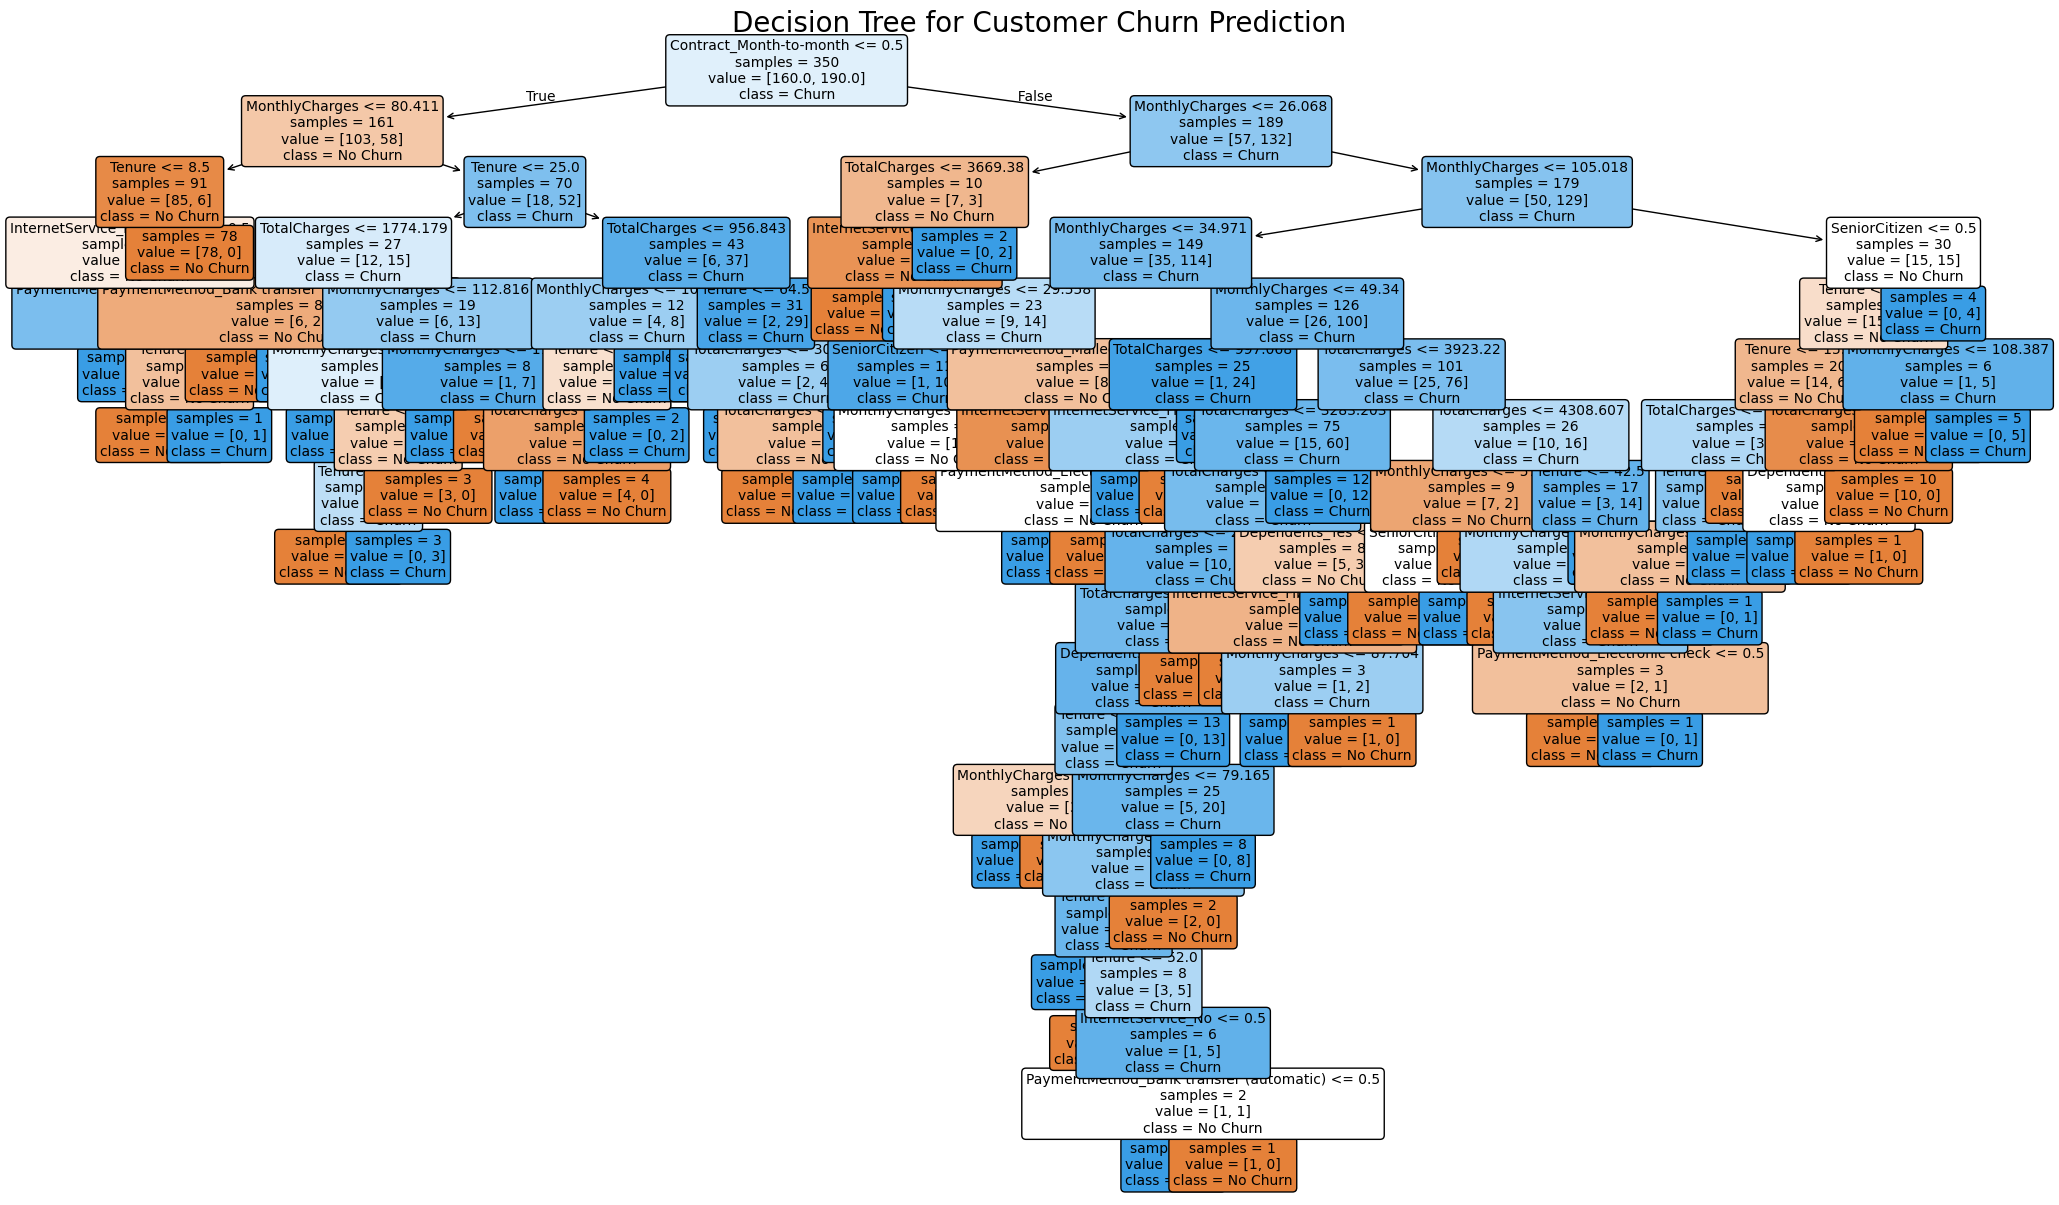

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 15))
plot_tree(model_orig,
          feature_names=X_encoded.columns,
          class_names=['No Churn', 'Churn'],
          filled=True,
          rounded=True,
          fontsize=10,
          impurity=False) # impurity=False hides Gini/entropy for cleaner view
plt.title('Decision Tree for Customer Churn Prediction', fontsize=20)
plt.show()

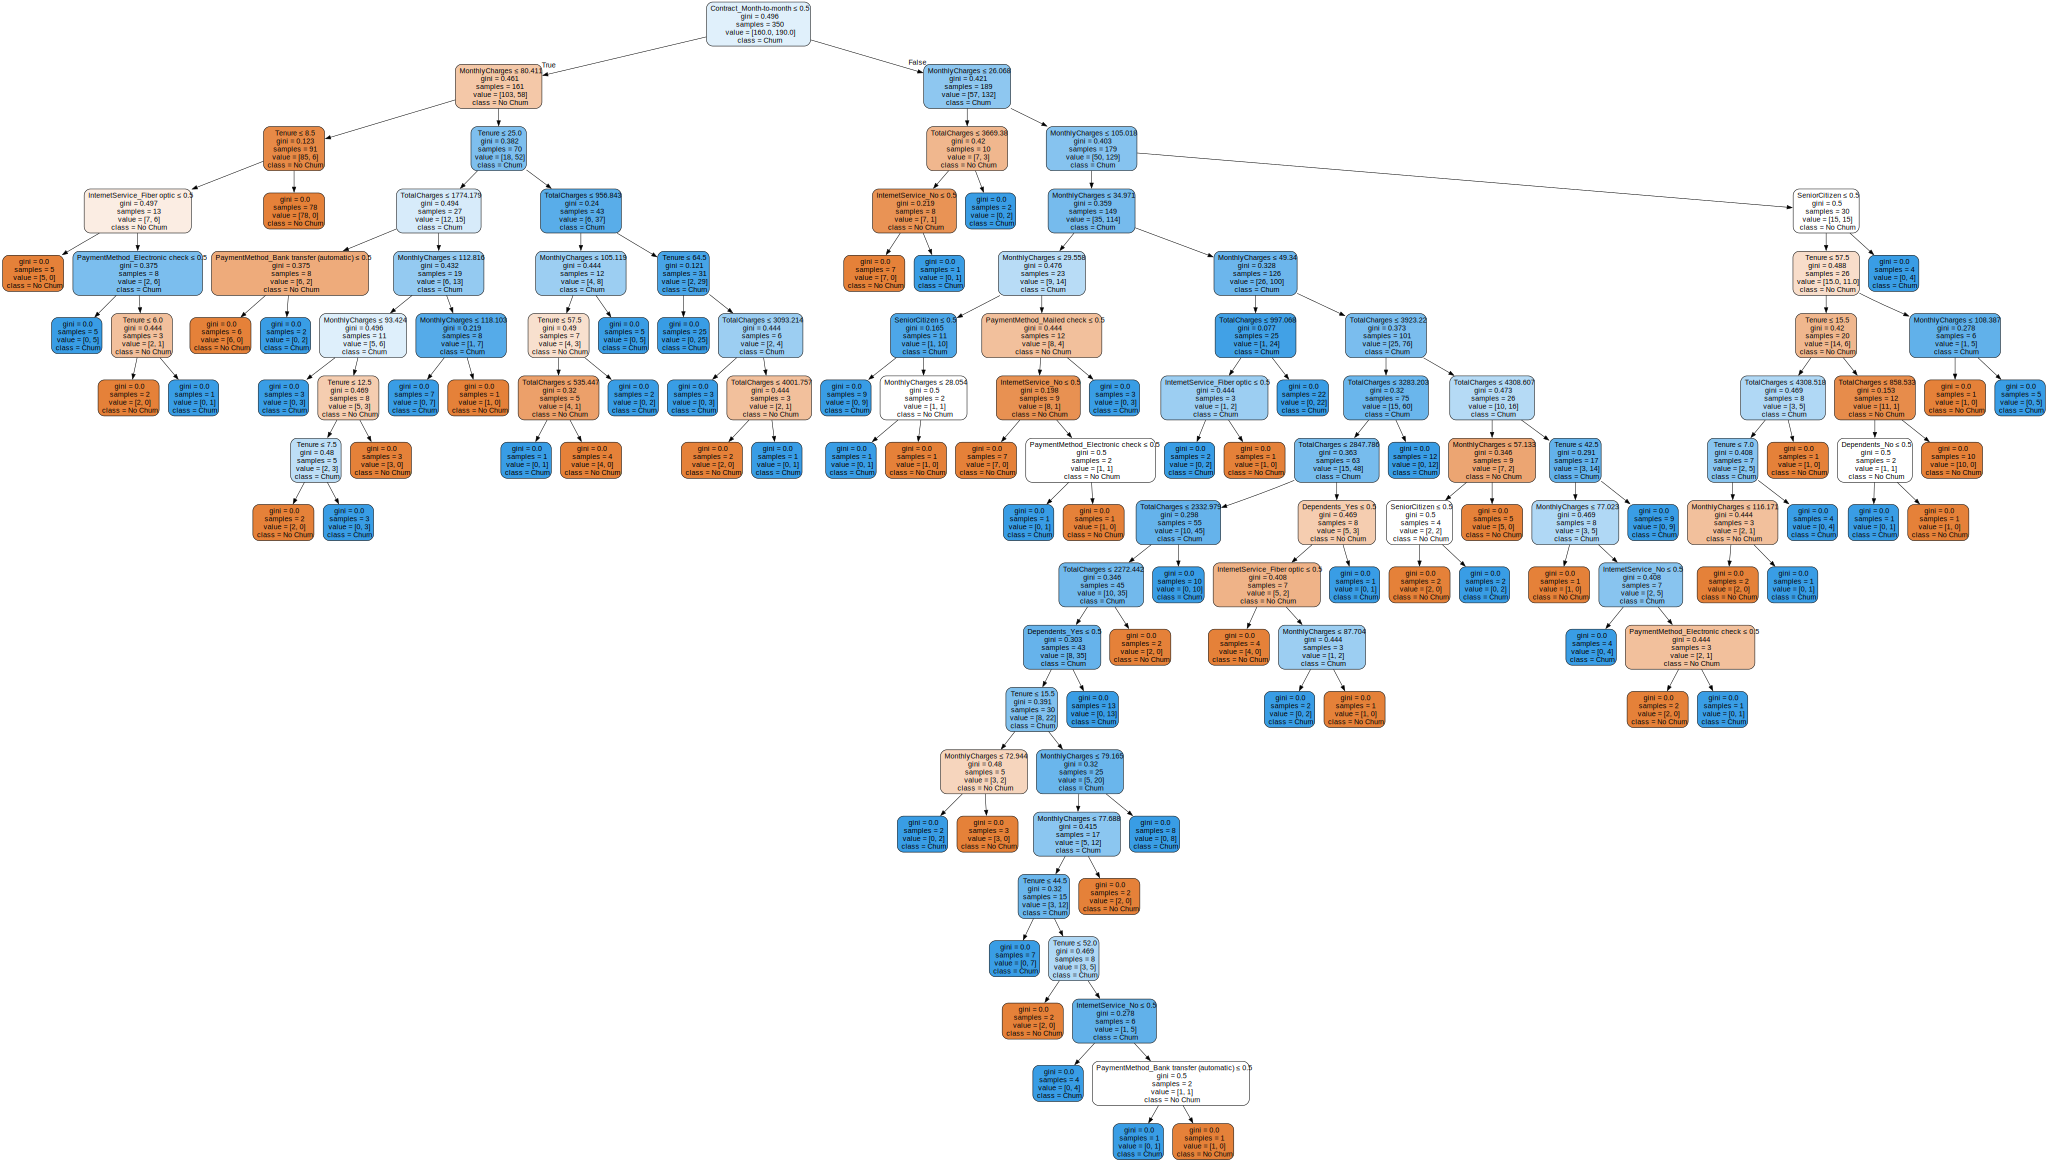

In [10]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model_orig, out_file=None,
                           feature_names=X_encoded.columns, # Use X_encoded.columns for feature names
                           class_names=['No Churn', 'Churn'], # Use actual class names based on y_encoded mapping
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph 

### Feature Importance

In [11]:
import numpy as np
print("Important features:",model_orig.feature_importances_)

print(np.sum(model_orig.feature_importances_))

Important features: [0.39884971 0.14507075 0.0295075  0.16373051 0.11446415 0.
 0.         0.00575658 0.01256534 0.         0.03637399 0.027161
 0.02302632 0.         0.02302632 0.02046784]
0.9999999999999998



Feature Importances:
                                    Feature  Importance
0                            MonthlyCharges    0.398850
3                                    Tenure    0.163731
1                              TotalCharges    0.145071
4                   Contract_Month-to-month    0.114464
10              InternetService_Fiber optic    0.036374
2                             SeniorCitizen    0.029507
11                       InternetService_No    0.027161
14           PaymentMethod_Electronic check    0.023026
12  PaymentMethod_Bank transfer (automatic)    0.023026
15               PaymentMethod_Mailed check    0.020468
8                            Dependents_Yes    0.012565
7                             Dependents_No    0.005757
6                         Contract_Two year    0.000000
5                         Contract_One year    0.000000
9                       InternetService_DSL    0.000000
13    PaymentMethod_Credit card (automatic)    0.000000


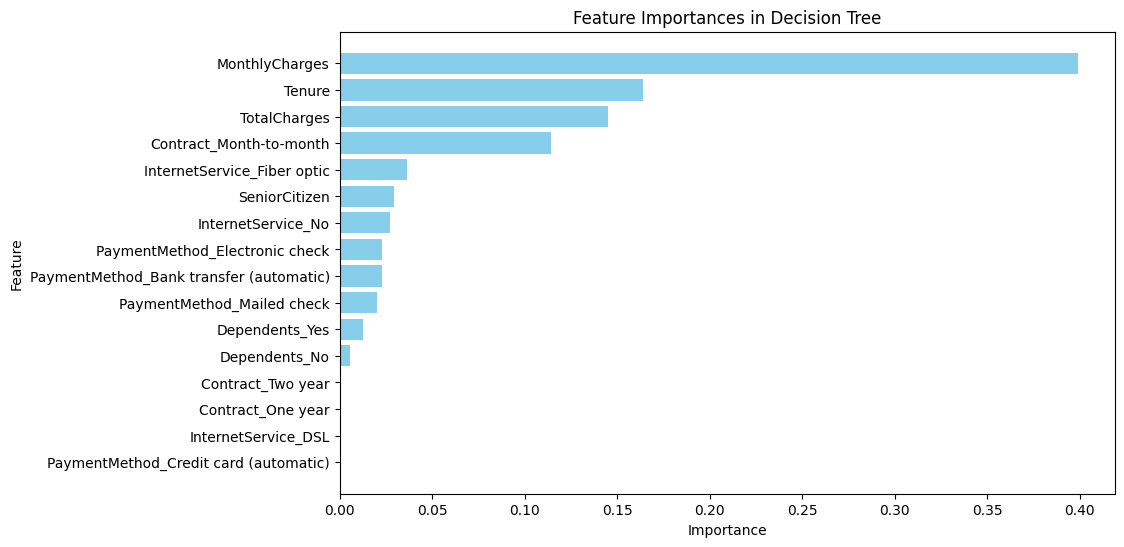

In [12]:
feature_importances = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': model_orig.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Decision Tree')
plt.gca().invert_yaxis() # Highest importance at the top
plt.show()

### Remove Unimportant features

In [13]:
importance_threshold = 0.01

# Identify features to remove
unimportant_features = feature_importances[feature_importances['Importance'] < importance_threshold]['Feature'].tolist()

print(f"\nFeatures to remove (importance < {importance_threshold}): ")
for temp in unimportant_features:
    print(temp)


Features to remove (importance < 0.01): 
Dependents_No
Contract_Two year
Contract_One year
InternetService_DSL
PaymentMethod_Credit card (automatic)


In [14]:
X_train_reduced = X_train_orig.drop(columns=unimportant_features)
X_test_reduced = X_test_orig.drop(columns=unimportant_features)

print("Original shape : ", X_train_orig.shape)
print("Reduced shape : ", X_train_reduced.shape)
X_train_reduced.head()

Original shape :  (350, 16)
Reduced shape :  (350, 11)


,MonthlyCharges,TotalCharges,SeniorCitizen,Tenure,Contract_Month-to-month,Dependents_Yes,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5,35.599452,854.953850,0,20,False,False,False,False,False,False,False
116,100.367208,352.335901,0,6,True,False,True,False,True,False,False
45,86.252228,1822.905454,0,64,False,False,True,False,True,False,False
16,50.424224,1913.493666,0,71,True,False,False,False,True,False,False
462,94.604488,1264.478093,0,25,True,False,False,False,True,False,False


In [15]:
model_reduced = DecisionTreeClassifier(random_state=42) # Use same random_state for consistency
model_reduced.fit(X_train_reduced, y_train_orig)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [16]:
y_pred_reduced = model_reduced.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test_orig, y_pred_reduced)

print("feature_importances : ",model_reduced.feature_importances_)
print(f"\nReduced Model Accuracy: {accuracy_reduced:.4f}")


feature_importances :  [0.39501199 0.16425935 0.01799434 0.17140595 0.11446415 0.01256534
 0.03445513 0.027161   0.02494518 0.01726974 0.02046784]

Reduced Model Accuracy: 0.6400


### Classification Report comparison

In [17]:
report_orig = classification_report(y_test_orig, y_pred_orig, target_names=['No Churn', 'Churn'], output_dict=True)

report_reduced = classification_report(y_test_orig, y_pred_reduced, target_names=['No Churn', 'Churn'], output_dict=True)



In [18]:
report_orig

{'No Churn': {'precision': 0.6133333333333333,
  'recall': 0.647887323943662,
  'f1-score': 0.6301369863013698,
  'support': 71.0},
 'Churn': {'precision': 0.6666666666666666,
  'recall': 0.6329113924050633,
  'f1-score': 0.6493506493506493,
  'support': 79.0},
 'accuracy': 0.64,
 'macro avg': {'precision': 0.6399999999999999,
  'recall': 0.6403993581743627,
  'f1-score': 0.6397438178260095,
  'support': 150.0},
 'weighted avg': {'precision': 0.6414222222222222,
  'recall': 0.64,
  'f1-score': 0.6402561821739904,
  'support': 150.0}}

In [19]:
report_reduced

{'No Churn': {'precision': 0.6133333333333333,
  'recall': 0.647887323943662,
  'f1-score': 0.6301369863013698,
  'support': 71.0},
 'Churn': {'precision': 0.6666666666666666,
  'recall': 0.6329113924050633,
  'f1-score': 0.6493506493506493,
  'support': 79.0},
 'accuracy': 0.64,
 'macro avg': {'precision': 0.6399999999999999,
  'recall': 0.6403993581743627,
  'f1-score': 0.6397438178260095,
  'support': 150.0},
 'weighted avg': {'precision': 0.6414222222222222,
  'recall': 0.64,
  'f1-score': 0.6402561821739904,
  'support': 150.0}}

### Decision Tree Tuning

In [20]:
model_tuned = DecisionTreeClassifier(max_depth=3, random_state=42)
model_tuned.fit(X_train_reduced, y_train_orig)


,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


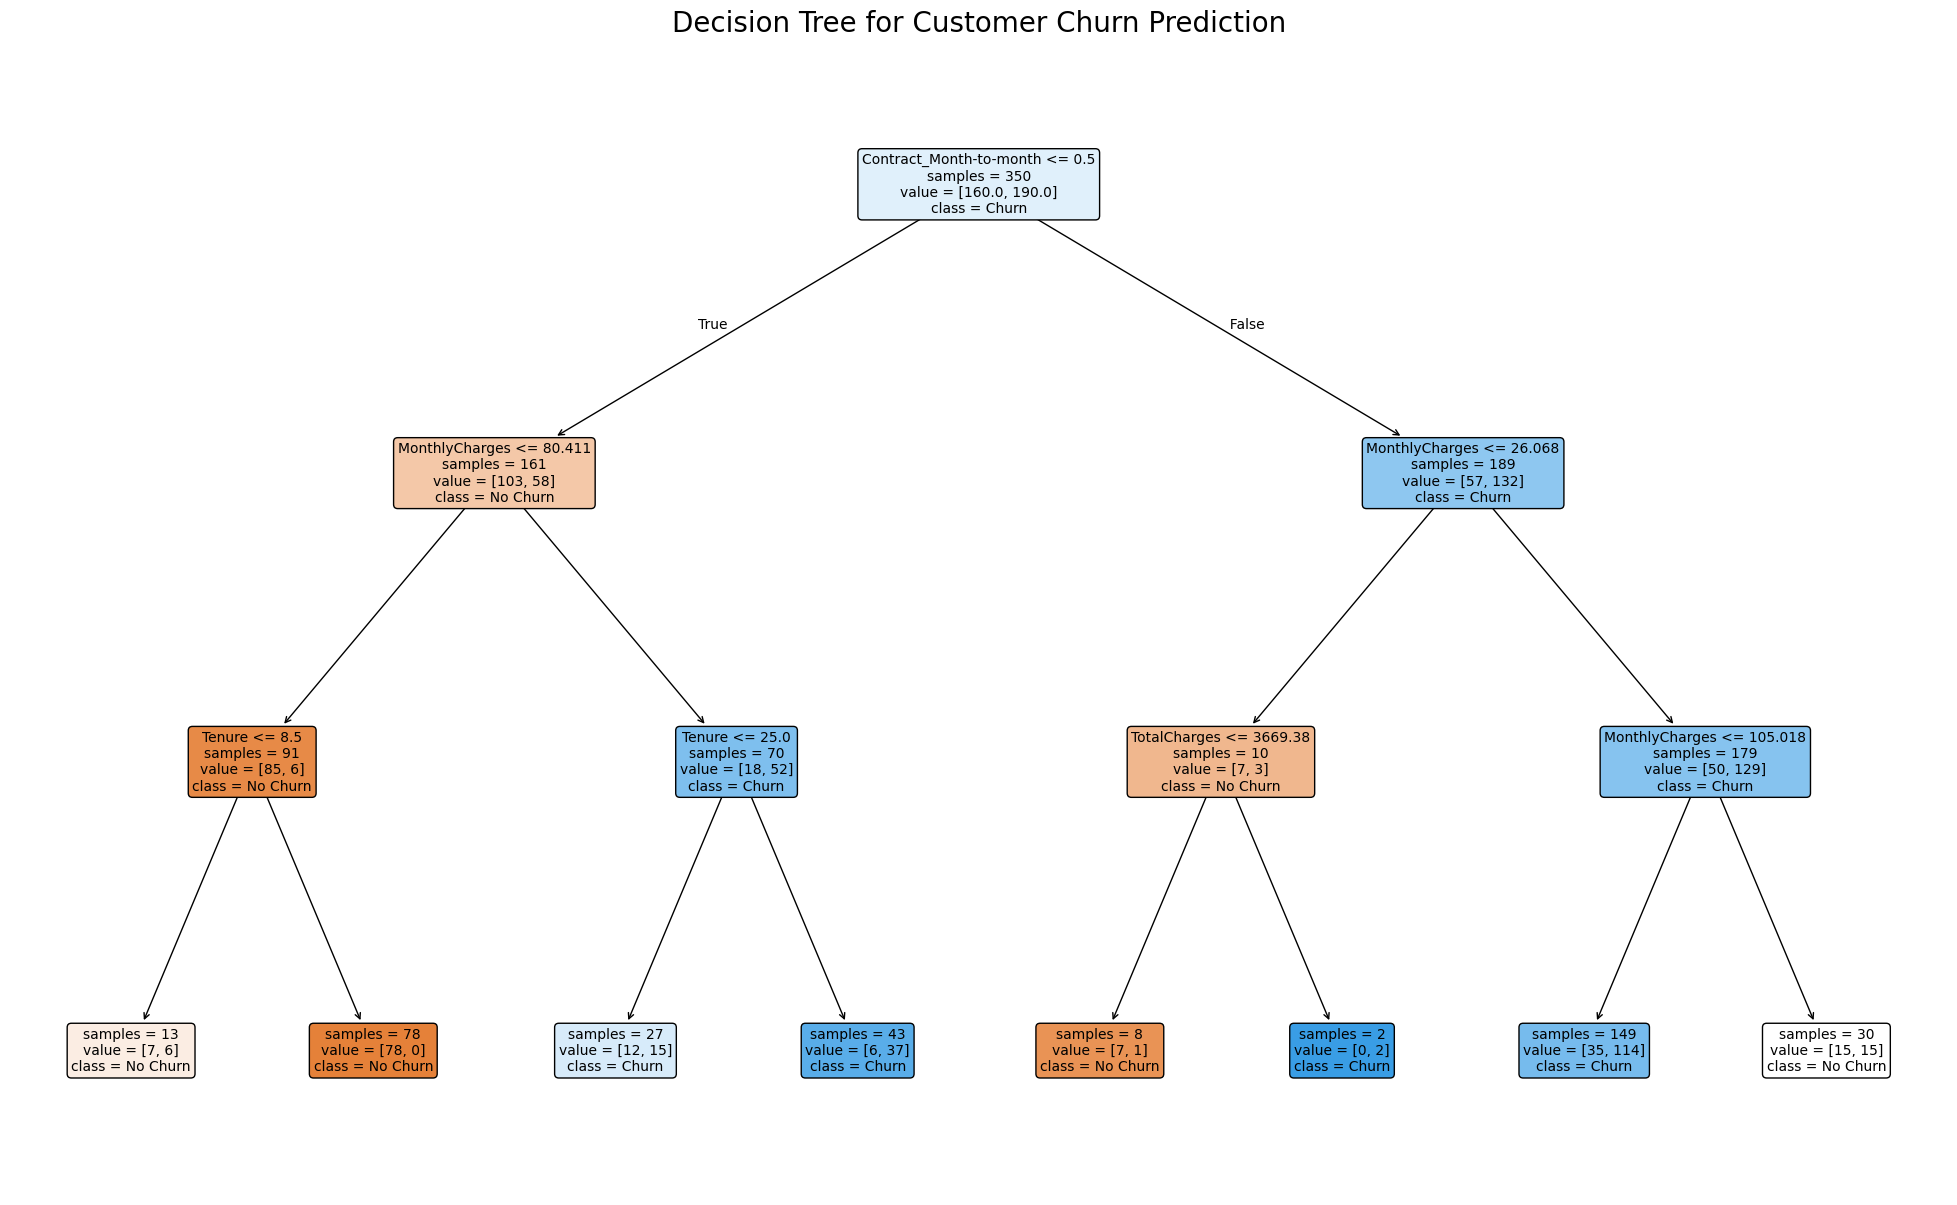

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 15))
plot_tree(model_tuned,
          feature_names=X_encoded.columns,
          class_names=['No Churn', 'Churn'],
          filled=True,
          rounded=True,
          fontsize=10,
          impurity=False) # impurity=False hides Gini/entropy for cleaner view
plt.title('Decision Tree for Customer Churn Prediction', fontsize=20)
plt.show()

In [22]:
tuned_y_pred = model_reduced.predict(X_test_reduced)
accuracy_tuned= accuracy_score(y_test_orig, tuned_y_pred)
print(f"\nReduced Model Accuracy: {accuracy_tuned:.4f}")


Reduced Model Accuracy: 0.6400


In [23]:
import joblib

# Save model
file_name = f'decision_tree_reduced_model_by_{ML_Summer_School_ID}.joblib'
joblib.dump(model_reduced, file_name)

['decision_tree_reduced_model_by_ML017_MyoThet.joblib']

In [24]:
# Load model
loaded_model_reduced = joblib.load(file_name)

# Make predictions
y_pred_reduced = loaded_model_reduced.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test_orig, y_pred_reduced)

print(f"\nReduced Model Accuracy: {accuracy_reduced:.4f}")


Reduced Model Accuracy: 0.6400
